In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

import os
import sys
from pathlib import Path
from pprint import pprint
import pickle
from scipy.optimize import curve_fit

from utils import analysis, utils, files # sibling package...

bars
- variance compared to movements
- explained by movements?
- height of target bar vs height of other bars? (some type of score)
- "shape" of bar data overall? 
  - dimensionality
  - ...?
- search strategy (dynamical modes?)

targets
- dimensionality
- search strategy
- comparison to natural movements (what movements are you making per target?)

In [13]:
def get_session_path_list(experiment, subject):
    path_dictionary = files.build_experiment_path_dict(experiment)
    session_dict = path_dictionary["subjects"][subject]["tasks"]["center_hold"]["sessions"]
    session_path_list = []

    for session in sorted(list(session_dict.keys()),key=lambda x: int(x.split("_")[-1])):
        session_path_list.append(session_dict[session])
    return session_path_list

def get_outcomes(experiment, subject):
    session_path_list = get_session_path_list(experiment, subject)
    num_sessions = len(session_path_list)
    hits = []
    misses = []
    noholds = []
    reach_times = []
    for behavior_path in session_path_list:
        outcome_path = [x for x in behavior_path.iterdir() if "result" in x.name][0]
        behavior = np.genfromtxt(str(outcome_path), delimiter=',', skip_header=1, dtype=None, encoding=None)
        outcomes = [x[0] for x in behavior]
        for x in behavior:
            if x[0] == "Hit":
                reach_times.append(x[2])
        uniques, counts = np.unique(outcomes, return_counts=True)
        for outcome, count in zip(uniques, counts):
            if outcome == "Hit":
                hits.append(count)
            elif outcome == "Miss":
                misses.append(count)
            elif outcome == "No Hold":
                noholds.append(count)
            else:
                raise ValueError("Unforeseen outcome in behavior: ", outcome)
        if "Hit" not in outcomes:
            hits.append(0)
        if "Miss" not in outcomes:
            misses.append(0)
        if "No Hold" not in outcomes:
            noholds.append(0)
    return hits, misses, noholds, num_sessions

def get_subjects(experiment, removed=None):
    folder = utils.get_experiment_data_folder(experiment)
    if removed is None:
        return [f.name for f in folder.iterdir()]
    else:
        return [f.name for f in folder.iterdir() if f.name not in removed]

def log(x, a, b):
    return b * np.log(x) + a

In [14]:
experiment = "emg_olympics"
subjects = get_subjects(experiment, removed=["andy","matthias","peter"])

aliases = {
    "jesse":"Placid Owner",
    "lars":"Luxury Boot",
    "bob":"Beaded Microchip",
    "peter":"Petty Driver" ,
    "miranda":"Reflective Director",
    "dammy":"Breezy Door",
    "oriol":"Crouching Turtle",
    "nate":"Hungry Tree",
    "april": "Decisive Apple",
    "zane":"Jubilant Butterfly",
    "georgia":"Pouncing Daffodil",
    "holly":"Reparable Semiconductor", 
    "alba":"Gregarious Stone",
    "svenja":"Benevolent Newspaper",
    "philip":"Dappled Stamp",
    "tom":"Dangling Cunieform",
    "lucas":"Fruitful Lorry",
    "fede":"Turbulent Stew",
    "andrei":"Drafty Elbow",
    "andy":"Striped Bottle",
    "peterg":"Scented Shovel",
    "emmett":"Serious Rainbow"
}

print(f"num subjects: {len(subjects)}:")
for subject in subjects:
    if subject not in list(aliases.keys()):
        print(f"NO ALIAS: ", subject)
    else:
        print(subject, "AKA", aliases[subject])


data folder:  /mnt/c/Users/spencer/data/emg_olympics
num subjects: 15:
alba AKA Gregarious Stone
april AKA Decisive Apple
bob AKA Beaded Microchip
dammy AKA Breezy Door
georgia AKA Pouncing Daffodil
holly AKA Reparable Semiconductor
jesse AKA Placid Owner
lars AKA Luxury Boot
miranda AKA Reflective Director
nate AKA Hungry Tree
oriol AKA Crouching Turtle
philip AKA Dappled Stamp
svenja AKA Benevolent Newspaper
tom AKA Dangling Cunieform
zane AKA Jubilant Butterfly


data folder:  /mnt/c/Users/spencer/data/emg_olympics
data folder:  /mnt/c/Users/spencer/data/emg_olympics
data folder:  /mnt/c/Users/spencer/data/emg_olympics
data folder:  /mnt/c/Users/spencer/data/emg_olympics


/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a
/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a
/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a
/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a


data folder:  /mnt/c/Users/spencer/data/emg_olympics
data folder:  /mnt/c/Users/spencer/data/emg_olympics
data folder:  /mnt/c/Users/spencer/data/emg_olympics
data folder:  /mnt/c/Users/spencer/data/emg_olympics


/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a
/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a
/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a
/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a


data folder:  /mnt/c/Users/spencer/data/emg_olympics
data folder:  /mnt/c/Users/spencer/data/emg_olympics
data folder:  /mnt/c/Users/spencer/data/emg_olympics
data folder:  /mnt/c/Users/spencer/data/emg_olympics


/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a
/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a
/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a
/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a


data folder:  /mnt/c/Users/spencer/data/emg_olympics
data folder:  /mnt/c/Users/spencer/data/emg_olympics
data folder:  /mnt/c/Users/spencer/data/emg_olympics


/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a
/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a
/tmp/ipykernel_4396/2440466779.py:50: RuntimeWarning: divide by zero encountered in log
  return b * np.log(x) + a


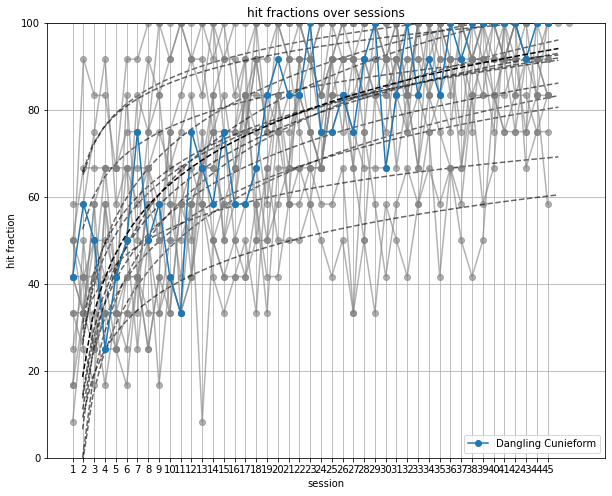

In [17]:
stats = []
hf=[]
fig, ax = plt.subplots(1,1,figsize=(10,8))
subjects_to_plot = ["lucas"]
for subject in subjects:
    hits, misses, noholds, num_sessions = get_outcomes(experiment, subject)
    fractions = [h*(100/12) for h in hits]
    sessions_idxs = range(len(fractions))
    x = np.linspace(0,num_sessions,50)
    popt, pcov = curve_fit(log, list(range(1, num_sessions+1)), fractions)
    total_fraction = 100*sum(hits)/(num_sessions*12)
    stats.append(f"{aliases[subject]}: \n Hit Fraction: {round(total_fraction,1)}% \n Baseline: {round(popt[0],1)}% \n Rate: {round(popt[1],1)} \n")
    hf.append(total_fraction)
    if subject in subjects_to_plot:
        ax.plot(fractions , "-o", label=aliases[subject],zorder=10)
        plt.plot(x, log(x, *popt), 'k--',zorder=10)
    else:
        ax.plot(fractions , "-o", color="gray", alpha=0.6)
        plt.plot(x, log(x, *popt), 'k--', alpha=0.6)
ax.set_xlabel("block")
ax.set_ylabel("hit fraction")
ax.set_title("hit fractions over sessions")
ax.set_ylim([0,100])
ax.set_xticks(range(num_sessions))
ax.set_xticklabels(range(1,num_sessions+1))
ax.grid()
ax.legend()

In [7]:
for i in np.argsort(hf)[::-1]:
    print(stats[i])

Pouncing Daffodil: 
 Hit Fraction: 94.3% 
 Baseline: 65.5% 
 Rate: 9.9 

Placid Owner: 
 Hit Fraction: 85.0% 
 Baseline: 27.7% 
 Rate: 20.0 

Luxury Boot: 
 Hit Fraction: 83.0% 
 Baseline: 53.4% 
 Rate: 10.3 

Crouching Turtle: 
 Hit Fraction: 80.2% 
 Baseline: 8.7% 
 Rate: 24.9 

Hungry Tree: 
 Hit Fraction: 76.9% 
 Baseline: 32.2% 
 Rate: 15.6 

Reparable Semiconductor: 
 Hit Fraction: 76.3% 
 Baseline: 28.4% 
 Rate: 16.7 

Jubilant Butterfly: 
 Hit Fraction: 74.1% 
 Baseline: 16.1% 
 Rate: 20.2 

Beaded Microchip: 
 Hit Fraction: 73.0% 
 Baseline: 2.2% 
 Rate: 24.7 

Reflective Director: 
 Hit Fraction: 68.7% 
 Baseline: 15.2% 
 Rate: 18.6 

Breezy Door: 
 Hit Fraction: 63.9% 
 Baseline: 12.6% 
 Rate: 17.9 

Gregarious Stone: 
 Hit Fraction: 63.0% 
 Baseline: 0.8% 
 Rate: 21.7 

Decisive Apple: 
 Hit Fraction: 59.6% 
 Baseline: 30.3% 
 Rate: 10.2 

